<a href="https://colab.research.google.com/github/arshad-huh/100-Days-Challenge/blob/main/19_pandas_III.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import numpy as np
import pandas as pd

# 10 challenging coding questions involving pandas, using the tips dataset from seaborn:

In [6]:
import seaborn as sns

tips = sns.load_dataset('tips')
tips

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


### How can you calculate the total bill per day for each gender using the tips dataset and present the results in a DataFrame?

In [9]:
df1 = tips.pivot_table(index='day', columns='sex', values='total_bill', aggfunc='sum')
df1

sex,Male,Female
day,,
Thur,561.44,534.89
Fri,198.57,127.31
Sat,1227.35,551.05
Sun,1269.46,357.70


<Axes: xlabel='day'>

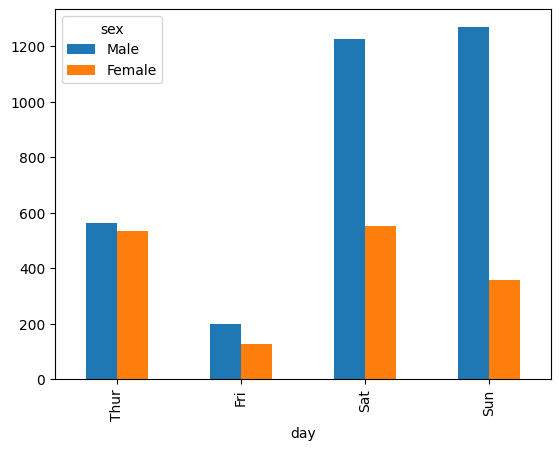

In [10]:
df1.plot(kind='bar')

### Create a new column called tip_percentage in the tips DataFrame that represents the tip as a percentage of the total bill. Then, calculate the average tip_percentage for each day.

In [12]:
tips['tips_pct'] = (tips['tip']/tips['total_bill']) *100
tips.groupby('day')['tips_pct'].mean()

day
Thur    16.127563
Fri     16.991303
Sat     15.315172
Sun     16.689729
Name: tips_pct, dtype: float64

### Find the maximum and minimum total bill for each combination of day and time (Lunch/Dinner).

In [13]:
tips.groupby(['day', 'time'])['total_bill'].agg(['min', 'max'])

min    max
day  time                
Thur Lunch    7.51  43.11
     Dinner  18.78  18.78
Fri  Lunch    8.58  16.27
     Dinner   5.75  40.17
Sat  Lunch     NaN    NaN
     Dinner   3.07  50.81
Sun  Lunch     NaN    NaN
     Dinner   7.25  48.17

### Using the tips dataset, determine the count of smokers and non-smokers for each day. Present the result in a DataFrame.

In [ ]:
tips.pivot_tbale